In [1]:
import emip_toolkit as tk
import pandas as pd
import em_generator as gen

In [2]:
image_path = "datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/stimuli/"

In [3]:
image = "rectangle_java2.jpg"

In [4]:
aoi = tk.find_aoi(image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg


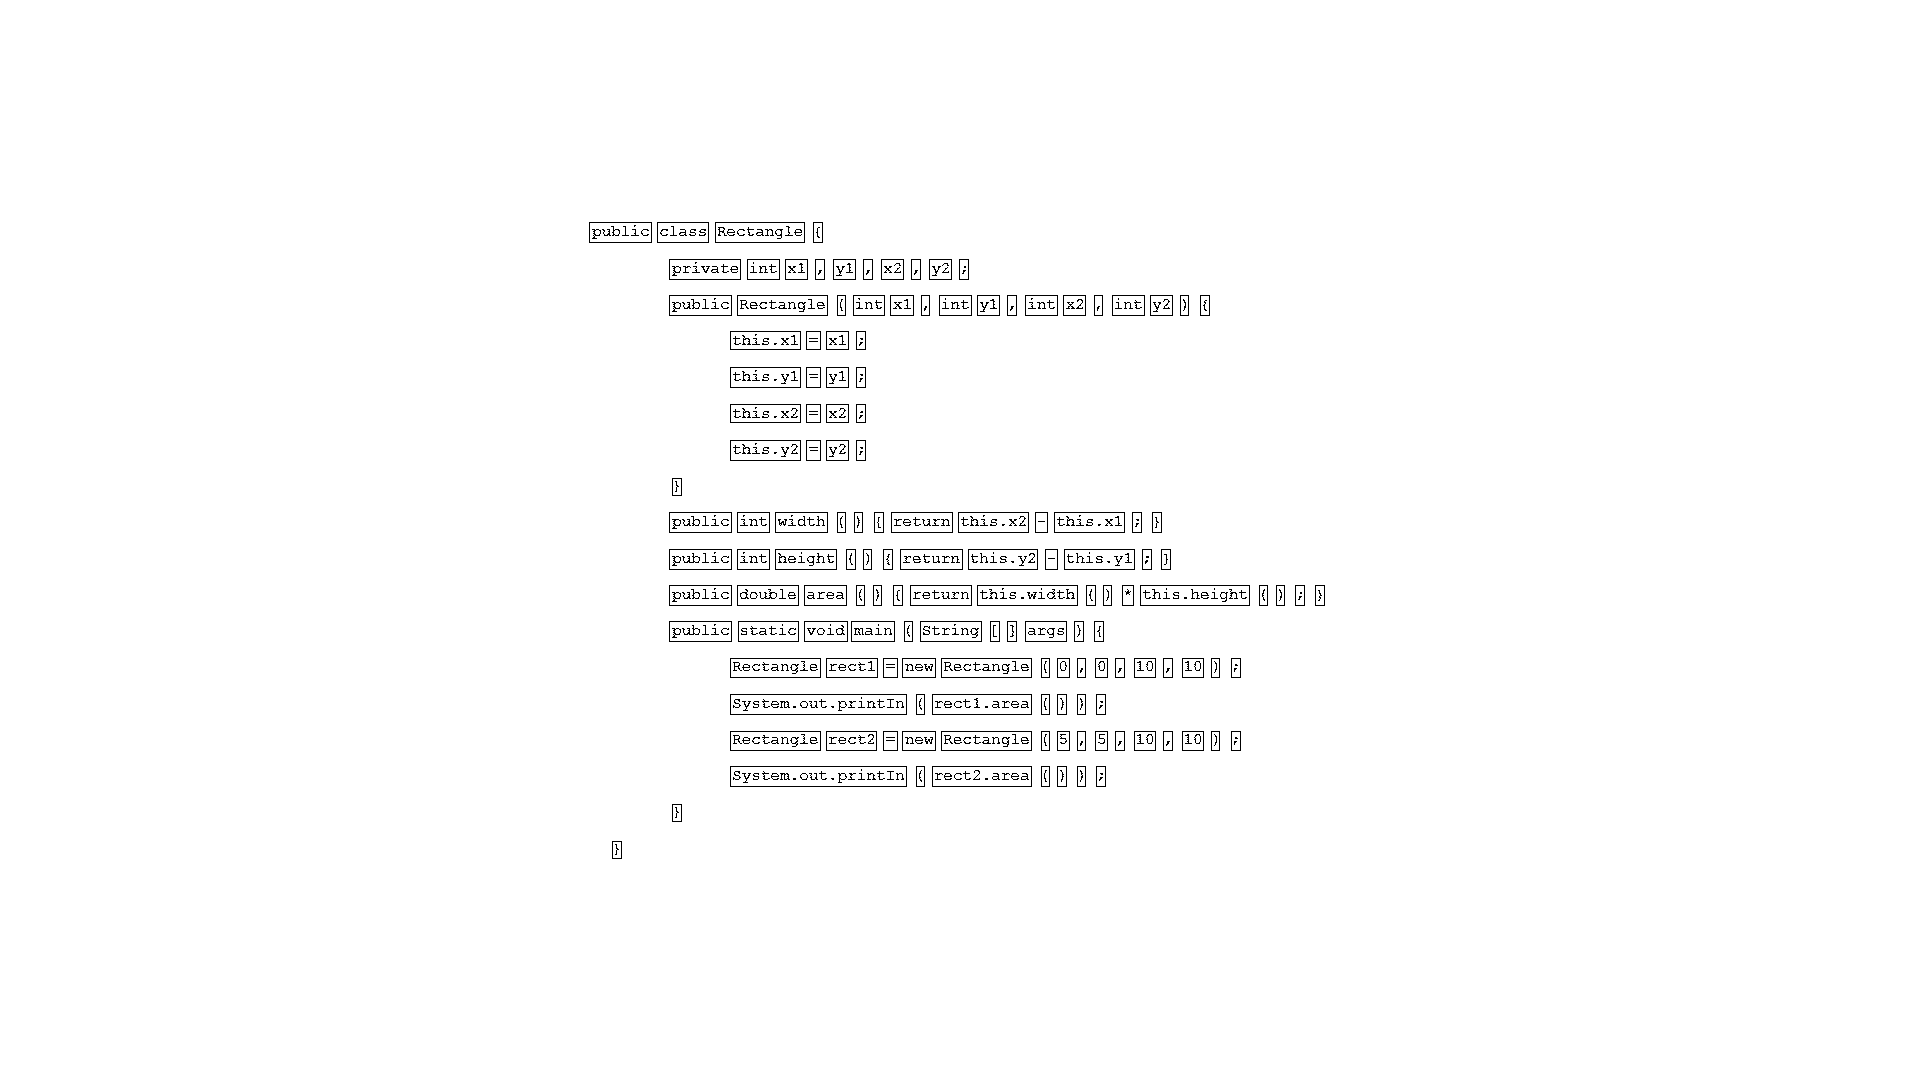

In [5]:
tk.draw_aoi(aoi, image, image_path)

### AOIs with Tokens

In [6]:
file_path = "datasets/EMIP/EMIP-Toolkit- replication package/emip_dataset/EMIP_DataCollection_Materials/emip_stimulus_programs/"

aois_with_tokens = tk.add_tokens_to_AOIs(file_path, aoi)

aois_with_tokens

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg,public
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg,class
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg,Rectangle
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg,{
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg,private
5,sub-line,line 2 part 2,747.5,259,33,21,rectangle_java2.jpg,int
6,sub-line,line 2 part 3,785.5,259,23,21,rectangle_java2.jpg,x1
7,sub-line,line 2 part 4,815.5,259,10,21,rectangle_java2.jpg,","
8,sub-line,line 2 part 5,833.5,259,23,21,rectangle_java2.jpg,y1
9,sub-line,line 2 part 6,863.5,259,10,21,rectangle_java2.jpg,","


#### Output to csv

In [7]:
# aois_with_tokens.to_csv('datasets/aois_with_tokens.csv', index=False)

### Center of Rectangles

In [8]:
center_x, center_y = gen.rectangle_center(aois_with_tokens["x"], aois_with_tokens["y"], aois_with_tokens["width"], aois_with_tokens["height"])

In [9]:
center_xy = list(zip(center_x, center_y))

In [10]:
center_xy_df = pd.DataFrame(center_xy, columns = ['center_x', 'center_y'])

In [11]:
center_xy_df

,center_x,center_y
0,621.0,232.5
1,683.5,232.5
2,760.5,232.5
3,818.5,232.5
4,705.5,269.5
5,764.0,269.5
6,797.0,269.5
7,820.5,269.5
8,845.0,269.5
9,868.5,269.5


#### Output to csv

In [12]:
# center_xy_df.to_csv('datasets/centers_of_tokens.csv', index=False)

### Skip

In [13]:
fixations_skip_df = pd.DataFrame(columns = ['x_cord', 'y_cord', 'token'])

In [14]:
# skip if the length of a token <= 2, with a probability 0.7
fixations_skip = gen.generate_fixations_skip(aois_with_tokens, threshold=2, skip_probability=0.7)

In [15]:
fixations_skip_df = pd.DataFrame(fixations_skip)

In [16]:
fixations_skip_df

,0,1,2
0,612.5,238.5,public
1,682.8,227.5,class
2,738.5,234.5,Rectangle
3,697.5,278.5,private
4,768.5,261.5,int
5,795.2,270.5,x1
6,840.2,269.5,y1
7,880.2,274.5,x2
8,954.8,259.5,;
9,698.5,302.5,public


#### Output to csv

In [17]:
# fixations__skip_df.to_csv('datasets/fixations_skip.csv', index=False)

### Left

In [18]:
fixations_left = gen.generate_fixations_left(aois_with_tokens)
fixations_left_df = pd.DataFrame(fixations_left)
fixations_left_df

,0,1,2
0,614.5,231.5,public
1,673.8,237.5,class
2,749.5,238.5,Rectangle
3,823.8,234.5,{
4,686.5,269.5,private
5,765.5,275.5,int
6,788.2,265.5,x1
7,813.8,269.5,","
8,839.2,270.5,y1
9,874.8,268.5,","


#### Output to csv

In [19]:
# fixations_left_df.to_csv('datasets/fixations_left.csv', index=False)

### Regression

In [20]:
fixations_reg = gen.generate_fixations_regression(aois_with_tokens, regression_probability=0.1)
fixations_reg_df = pd.DataFrame(fixations_reg)
fixations_reg_df

,0,1,2
0,589.5,222,public
1,657.5,222,class
2,715.5,222,Rectangle
3,813.5,222,{
4,669.5,259,private
5,747.5,259,int
6,785.5,259,x1
7,669.5,259,private
8,747.5,259,int
9,785.5,259,x1


#### Output to csv

In [21]:
# fixations_reg_df.to_csv('datasets/fixations_reg.csv', index=False)

### Left + Regression

In [22]:
fixations_left_reg = gen.generate_fixations_left_regression(aois_with_tokens, regression_probability=0.1)

In [23]:
fixations_left_reg_df = pd.DataFrame(fixations_left_reg)

In [24]:
fixations_left_reg_df

,0,1,2
0,600.5,240.5,public
1,664.8,230.5,class
2,617.5,240.5,public
3,678.8,232.5,class
4,752.5,229.5,Rectangle
5,820.8,232.5,{
6,703.5,265.5,private
7,616.5,231.5,public
8,670.8,237.5,class
9,744.5,225.5,Rectangle


#### Output to csv

In [25]:
# fixations_left_reg_df.to_csv('datasets/fixations_left_reg.csv', index=False)

### Left + Regression + Skip

In [26]:
fixations_left_reg_skip = gen.generate_fixations_left_regression_skip(aois_with_tokens, 0.1, 2, 0.7)
fixations_left_reg_skip_df = pd.DataFrame(fixations_left_reg_skip)
fixations_left_reg_skip_df

,0,1,2
0,604.5,234.5,public
1,668.8,241.5,class
2,752.5,234.5,Rectangle
3,605.5,237.5,public
4,677.8,232.5,class
5,615.5,238.5,public
6,684.8,235.5,class
7,754.5,242.5,Rectangle
8,613.5,233.5,public
9,678.8,239.5,class


#### Output to csv

In [27]:
# fixations_left_reg_skip_df.to_csv('datasets/fixations_left_reg_skip.csv', index=False)